If the number of processed nodes < total nodes, a cycle exists.

In [ ]:
bool hasCycle(int V, vector<vector<int>>& adj) {
    vector<int> indegree(V, 0);
    for (int u = 0; u < V; ++u) {
        for (int v : adj[u]) {
            indegree[v]++;
        }
    }

    queue<int> q;
    for (int i = 0; i < V; ++i) {
        if (indegree[i] == 0) q.push(i);
    }

    int count = 0;
    while (!q.empty()) {
        int u = q.front(); q.pop();
        count++;
        for (int v : adj[u]) {
            indegree[v]--;
            if (indegree[v] == 0) q.push(v);
        }
    }

    // If not all nodes were processed, there's a cycle
    return count != V;
}


https://www.geeksforgeeks.org/problems/detect-cycle-in-an-undirected-graph/1

In [ ]:
//ppa

In [ ]:
class Solution {
    public:
  
  void dfs(int node, vector<int> al[], vector<int> &vis, bool &cycle, int parent){
      if(vis[node]){
          cycle=1;
          return;
      } 
      vis[node]=1;

      for(int i=0;i<al[node].size();i++){
          if(al[node][i]==parent){
            continue;
          } 
          dfs(al[node][i], al,vis,cycle,node);
      }
  }
  
  
  bool isCycle(int n, vector<int> al[]) {
      bool cycle=0;
      vector<int> vis(n,0);
      for(int i=0;i<n;i++){
          if(!vis[i]){
              dfs(i,al,vis,cycle,-1);
              if(cycle) return 1;
          } 
      }
  
      return 0;
  }
  
  
  };

In [ ]:
//striver
bool dfs(int node, int par, vector<int> &vis, vector<int> al[]){
    vis[node]=1;
    for(int nei: al[node]){
        if(!vis[nei]){
            if(dfs(nei,node,vis,al)){
                return 1;
            } 
        } 
        else if(nei!=par){
            return 1;
        } 
    }
    return 0;
}

bool isCycle(int n, vector<int> al[]) {
    vector<int> vis(n,0);
    for(int i=0;i<n;i++){
        if(!vis[i]){
            if(dfs(i,-1,vis,al)){
                return 1;
            } 
        }
    }
    return 0;
}

# Directed

https://www.geeksforgeeks.org/problems/detect-cycle-in-a-directed-graph/1

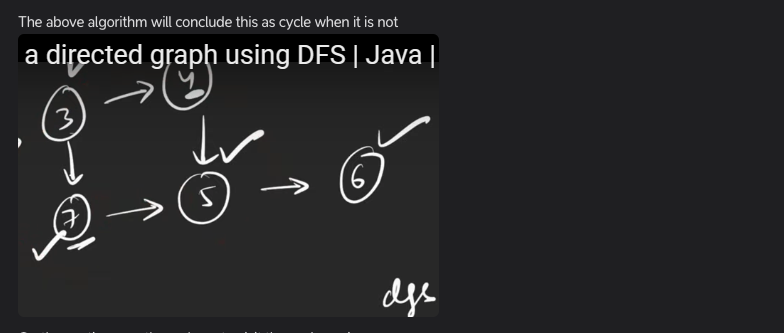

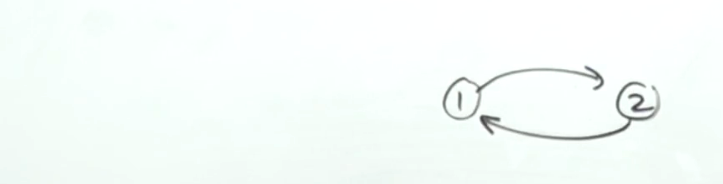

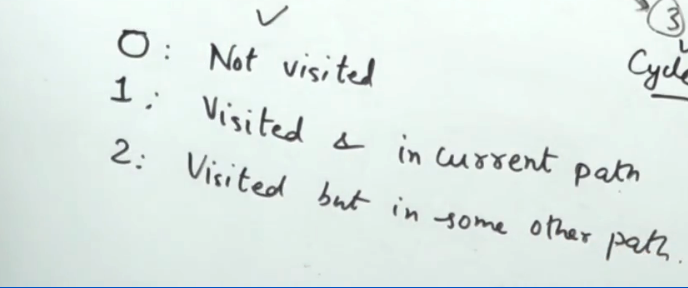

In [ ]:
class Solution {
    public:
      // Function to detect cycle in a directed graph.
  void dfs(int node, vector<int> al[], vector<int> &vis, bool &cycle){
      if(vis[node]){
          if(vis[node]==1){
            cycle=1;
          }
          return;
      } 
      vis[node]=1;
      for(int i=0;i<al[node].size();i++){
          dfs(al[node][i], al,vis,cycle);
      }
      vis[node]=2;
  }
  
  
  bool isCyclic(int n, vector<int> al[]) {
      bool cycle=0;
      vector<int> vis(n,0);
  
      for(int i=0;i<n;i++){
          if(!vis[i]){
            dfs(i,al,vis,cycle);
          } 
          if(cycle){
            return 1;
          } 
      }      
      return 0;
      // code here
  }
  };

concept of visited and path visited array   
https://www.youtube.com/watch?v=9twcmtQj4DU

In [ ]:
bool dfs(int node, vector<bool> &vis, vector<bool> & pathVis, vector<int> al[]){
    vis[node]=1;
    pathVis[node]=1;
    
    for(int nei: al[node]){
        if(!vis[nei]){
            if(dfs(nei,vis,pathVis,al)==1) return 1;
        }
        // it means vis[nei]==1 then only it come here
        else if(pathVis[nei]) return 1;
    }
    
    pathVis[node]=0;
    return 0;
}


bool isCyclic(int n, vector<int> al[]) {
    vector<bool> vis(n,0),pathVis(n,0);
    for(int i=0;i<n;i++){
        if(dfs(i,vis,pathVis,al)==1) return 1;
    }
    return 0;
}